In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\Hari Manoj\\Downloads\\archive (1)\\spam.csv', encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# data cleaning 




In [22]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [23]:
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [27]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [32]:
df['target']=encoder.fit_transform(df['target'])

In [33]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [35]:
df.duplicated().sum()

403

In [38]:
df=df.drop_duplicates(keep='first')

In [39]:
df.shape


(5169, 2)

# EDA

In [40]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
graph=df['target'].value_counts()

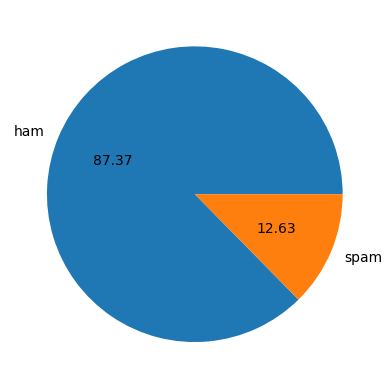

In [51]:
plt.pie(graph,labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [53]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Hari
[nltk_data]     Manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
df['num_characters']=df['text'].apply(len)

In [56]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [59]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [60]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [62]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [66]:
#ham messgages
df[df['target'] == 0 ] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [67]:
#spam msgs
df[df['target'] == 1 ] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot: xlabel='num_words', ylabel='Count'>

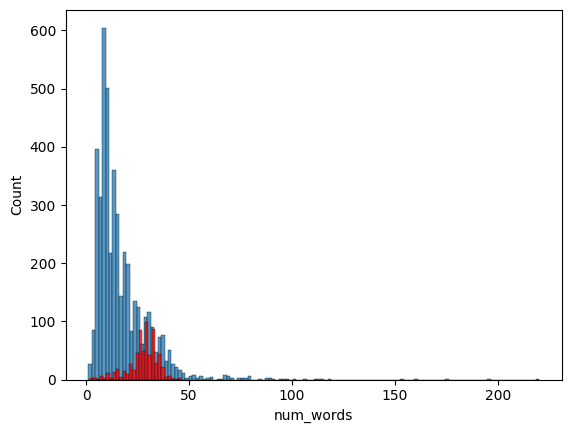

In [72]:
#histplot for num_words
sns.histplot(df[df['target']== 0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'],color='red')

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

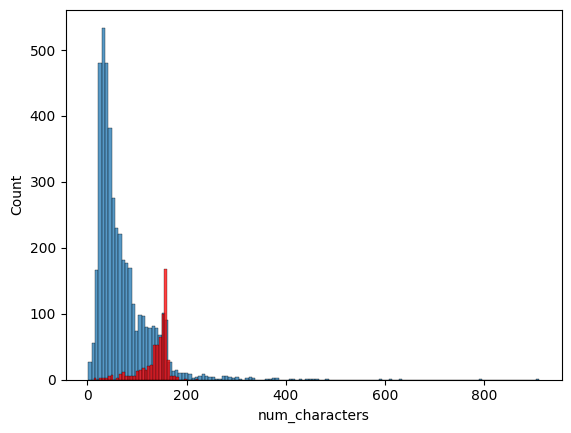

In [73]:
sns.histplot(df[df['target']== 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_sentences', ylabel='Count'>

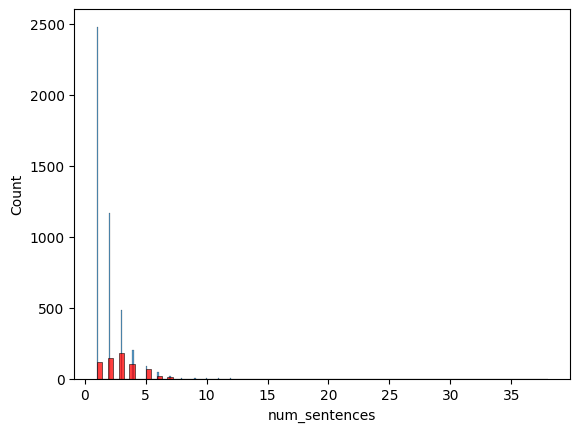

In [74]:
sns.histplot(df[df['target']== 0]['num_sentences'])
sns.histplot(df[df['target']== 1]['num_sentences'],color='red')

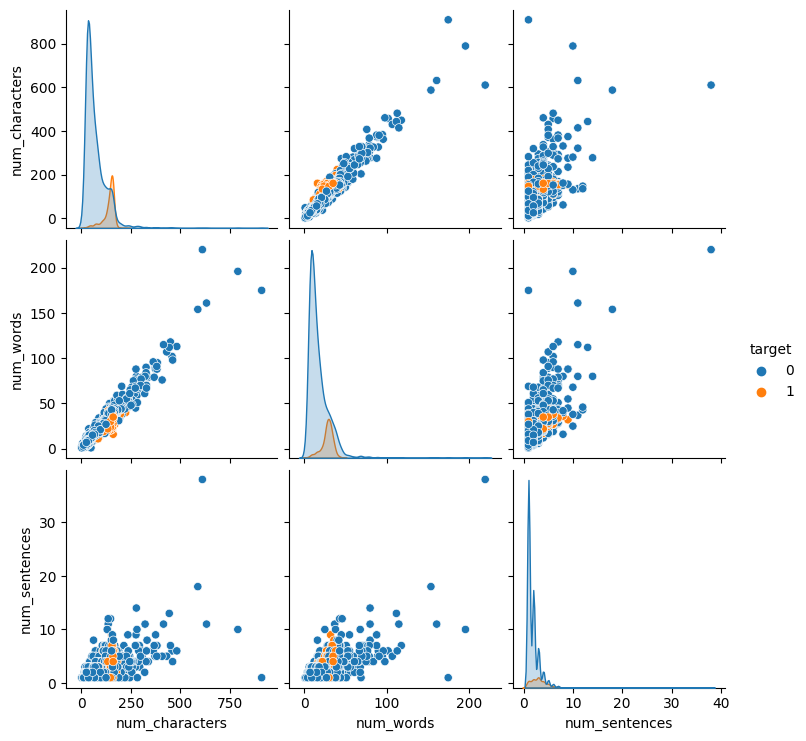

In [75]:
sns.pairplot(df,hue='target')

In [76]:
df.corr()

C:\Users\Hari Manoj\AppData\Local\Temp\ipykernel_5928\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


C:\Users\Hari Manoj\AppData\Local\Temp\ipykernel_5928\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

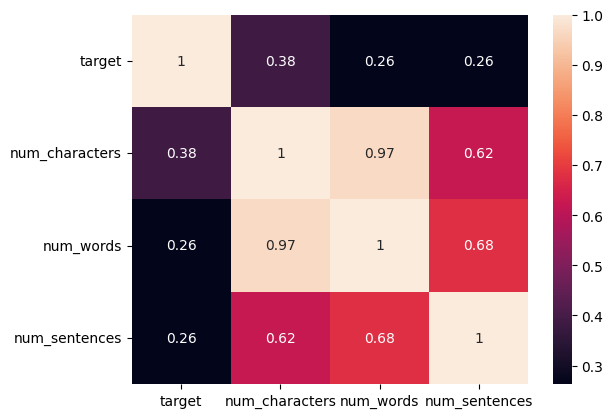

In [78]:
sns.heatmap(df.corr(),annot=True)

# DATA PREPROCESSING

In [94]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Hari
[nltk_data]     Manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [111]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('dancing')

'danc'

In [115]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
     
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
        
    
    return " ".join(y)


In [116]:
transform_text('i loved the Yt lectures from 1 week@@ ')

'love yt lectur 1 week'

In [119]:
df['transformed_text'] = df['text'].apply(transform_text)

In [120]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [131]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='White')



<Figure size 1200x1600 with 0 Axes>

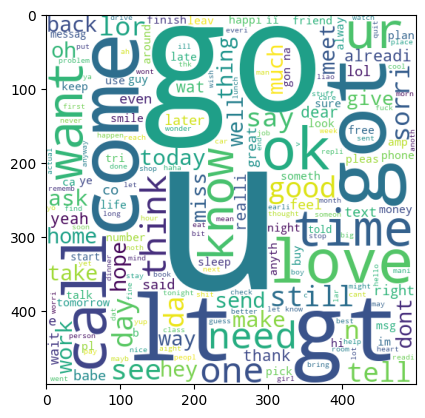

<Figure size 1200x1600 with 0 Axes>

In [137]:
ham_wc= wc.generate(df[df['target']==0] ['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.figure(figsize=(12,16))

<Figure size 1200x1600 with 0 Axes>

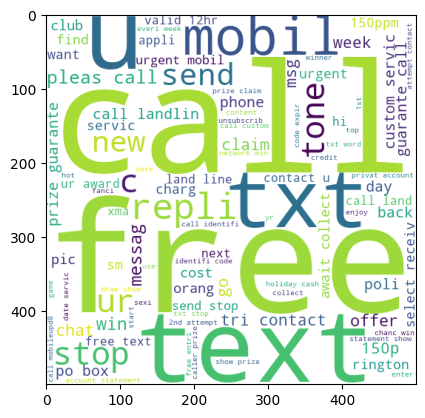

<Figure size 1200x1600 with 0 Axes>

In [136]:
spam_wc= wc.generate(df[df['target']==1] ['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.figure(figsize=(12,16))

In [140]:
## to get top 25 words in spam corpus 

spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)



In [144]:
from collections import Counter 
Counter(spam_corpus).most_common(25)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51)]

In [141]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [145]:
len(spam_corpus)

9939

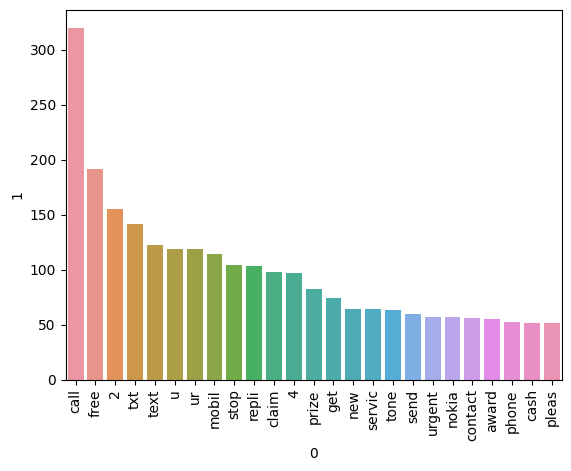

In [165]:
from collections import Counter 
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(25))[1])
plt.xticks(rotation='vertical')
plt.show()

In [149]:
## to get most common words for ham corpus

ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)



In [150]:
len(ham_corpus)

35404

In [151]:
from collections import Counter 
Counter(ham_corpus).most_common(25)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147)]

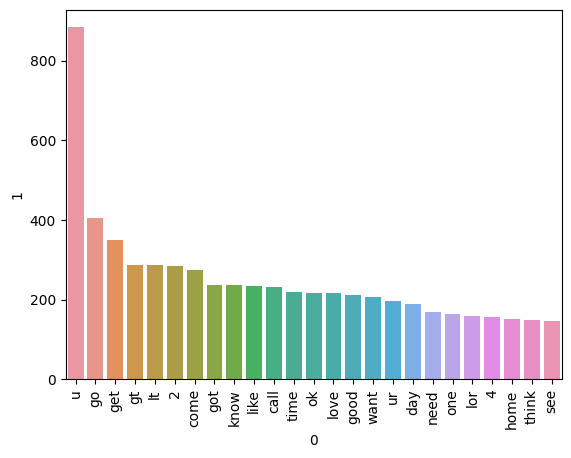

In [166]:
from collections import Counter 
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(25))[1])
plt.xticks(rotation='vertical')
plt.show()

In [167]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# model building

In [296]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfvec=TfidfVectorizer(max_features=3000)

In [297]:
X=tfvec.fit_transform(df['transformed_text']).toarray()

In [298]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [299]:
X.shape

(5169, 3000)

In [300]:
y=df['target'].values

In [301]:
y.shape

(5169,)

In [302]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [303]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
X, y, test_size=0.25, random_state=4)

In [304]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [305]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
g_nb=GaussianNB()
m_nb=MultinomialNB()
b_nb=BernoulliNB()


In [306]:
## performance of guassianNB algorithm

g_nb.fit(X_train,y_train)
y_pred_gnb=g_nb.predict(X_test)

print(accuracy_score(y_pred_gnb,y_test))
print(precision_score(y_pred_gnb,y_test))
print(confusion_matrix(y_pred_gnb,y_test))

0.860015467904099
0.8490566037735849
[[977  24]
 [157 135]]


In [307]:
## performance of mutlinomialNB

m_nb.fit(X_train,y_train)
y_pred_mnb=m_nb.predict(X_test)


print(accuracy_score(y_pred_mnb,y_test))
print(precision_score(y_pred_mnb,y_test))
print(confusion_matrix(y_pred_mnb,y_test))


0.97138437741686
0.7735849056603774
[[1133   36]
 [   1  123]]


In [308]:
## performance of BernoulliNB

b_nb.fit(X_train,y_train)
y_pred_bnb=m_nb.predict(X_test)


print(accuracy_score(y_pred_bnb,y_test))
print(precision_score(y_pred_bnb,y_test))
print(confusion_matrix(y_pred_bnb,y_test))

0.97138437741686
0.7735849056603774
[[1133   36]
 [   1  123]]


In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [310]:
Lr=LogisticRegression(solver='liblinear')
svc=SVC(kernel='sigmoid',gamma=1.0)
gnb=GaussianNB()
decisiontree=DecisionTreeClassifier(max_depth=5)
knn=KNeighborsClassifier()
randomforest=RandomForestClassifier(n_estimators=50, random_state=2)
adaboost=AdaBoostClassifier(n_estimators=50,random_state=2)
bagging=BaggingClassifier(n_estimators=50,random_state=2)
gradient=GradientBoostingClassifier(n_estimators=50,random_state=2)
xtratree=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [319]:
clf={
    'Lr':Lr,
    'svm':svc,
    'gnb':gnb,
    'dt':decisiontree,
    'knn':knn,
    'rf':randomforest,
    'ada':adaboost,
    'bag':bagging,
    'gradient':gradient,
    'xtree':xtratree
}

In [312]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    accuracy=accuracy_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    
    return accuracy,precision

In [313]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9760247486465584, 0.8364779874213837)

In [314]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clf.items():
    
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("for ",name)
    print("accuracy -",current_accuracy)
    print("precision -",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  Lr
accuracy - 0.9520494972931168
precision - 0.6226415094339622
for  svm
accuracy - 0.9760247486465584
precision - 0.8364779874213837
for  gnb
accuracy - 0.860015467904099
precision - 0.8490566037735849
for  dt
accuracy - 0.9381283836040216
precision - 0.6289308176100629
for  knn
accuracy - 0.9149265274555298
precision - 0.3081761006289308
for  rf
accuracy - 0.9698375870069605
precision - 0.7672955974842768
for  ada
accuracy - 0.9675174013921114
precision - 0.7987421383647799
for  bag
accuracy - 0.9659706109822119
precision - 0.8113207547169812
for  gradient
accuracy - 0.9520494972931168
precision - 0.6477987421383647
for  xtree
accuracy - 0.9760247486465584
precision - 0.8113207547169812


In [317]:
performance_df = pd.DataFrame({'algorithms':clf.keys(),'accuracy':accuracy_scores,'precision':precision_scores}).sort_values('accuracy',ascending=False)

In [321]:
performance_df

,algorithms,accuracy,precision
1,svm,0.976025,0.836478
9,xtree,0.976025,0.811321
5,rf,0.969838,0.767296
6,ada,0.967517,0.798742
7,bag,0.965971,0.811321
0,Lr,0.952049,0.622642
8,gradient,0.952049,0.647799
3,dt,0.938128,0.628931
4,knn,0.914927,0.308176
2,gnb,0.860015,0.849057


In [322]:
performance_df = pd.DataFrame({'algorithms':clf.keys(),'accuracy':accuracy_scores,'precision':precision_scores}).sort_values('precision',ascending=False)

In [323]:
performance_df


,algorithms,accuracy,precision
2,gnb,0.860015,0.849057
1,svm,0.976025,0.836478
7,bag,0.965971,0.811321
9,xtree,0.976025,0.811321
6,ada,0.967517,0.798742
5,rf,0.969838,0.767296
8,gradient,0.952049,0.647799
3,dt,0.938128,0.628931
0,Lr,0.952049,0.622642
4,knn,0.914927,0.308176


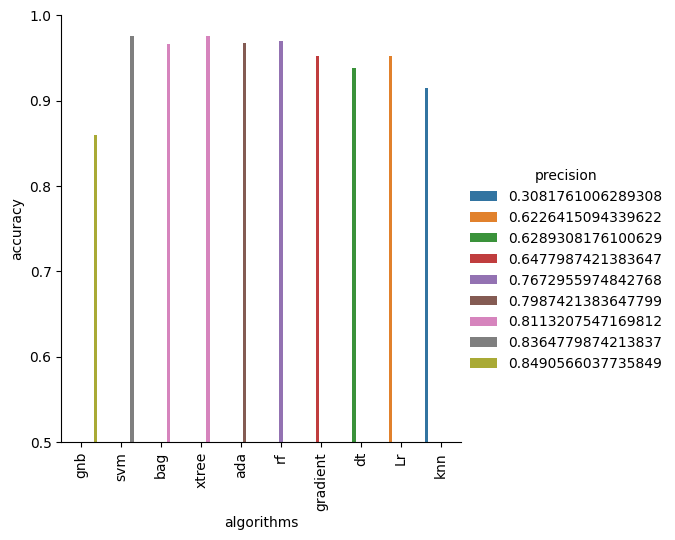

In [324]:
sns.catplot(x='algorithms',y='accuracy'
           ,hue='precision',data=performance_df ,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [337]:
#voting classifer

svm=SVC(kernel='sigmoid',gamma=1.0,probability=True)
bag=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [338]:
voting=VotingClassifier(estimators=[('svm',svc),('bag',bag),('xtree',etc)],voting='hard')

In [339]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                             ('bag',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('xtree',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [341]:
y_pred_vote= voting.predict(X_test)

print("accuracy",accuracy_score(y_pred_vote,y_test))
print("precision",precision_score(y_pred_vote,y_test))

accuracy 0.9783449342614076
precision 0.8364779874213837


In [342]:
#apply stacking
estimators=[('svm',svc),('bag',bag),('xtree',etc)]
final_estimator=RandomForestClassifier(n_estimators=50, random_state=2)


from sklearn.ensemble import StackingClassifier
sc=StackingClassifier(estimators=estimators,final_estimator=final_estimator)
sc.fit(X_train,y_train)





StackingClassifier(estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                               ('bag',
                                BaggingClassifier(n_estimators=50,
                                                  random_state=2)),
                               ('xtree',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier(n_estimators=50,
                                                          random_state=2))

In [344]:
y_pred_stack= sc.predict(X_test)

print("accuracy",accuracy_score(y_pred_stack,y_test))
print("precision",precision_score(y_pred_stack,y_test))

accuracy 0.9783449342614076
precision 0.8805031446540881


In [346]:
import pickle 
pickle.dump(tfvec,open('vectorizer.pkl','wb'))
pickle.dump(sc,open('model.pkl','wb'))
